# Speed Bumps

One way to measure a neighborhood's ability to hold a street race is to measure how many speed bumps are in the neighborhood. In our case `MORE SPEEDBUMPS = MORE DANGEROUS` which is not good when considering a race track

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

## Getting the data

Below is a data set pulledfrom the WPRDC on all of the speed bumps in Pittsburgh. Each speed bump is described using data like location, what it is made of, and its id

In [5]:
speed_humps_data = pd.read_csv("speed_humps.csv")
speed_humps_data.head(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


Most of this data isnt useful to us so lets narrow it down to how many times each neighborhood is mentioned in the data

This is helpful because this will now sort the data by neighborhood and speed bump count rather than each speed bumps id and all of its data

In [7]:
humps_per_hood = speed_humps_data["neighborhood"].value_counts()
humps_per_hood.head(10)

Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
Upper Hill              4
Perry North             4
South Side Slopes       4
Homewood South          4
Brookline               4
Garfield                3
Name: neighborhood, dtype: int64

## Visualizing the Data

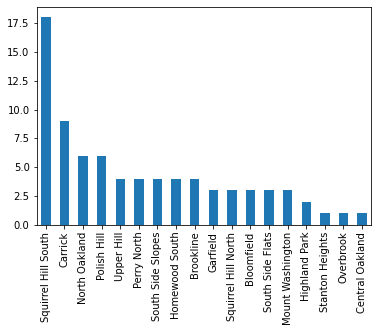

In [8]:
humps_per_hood.plot.bar()

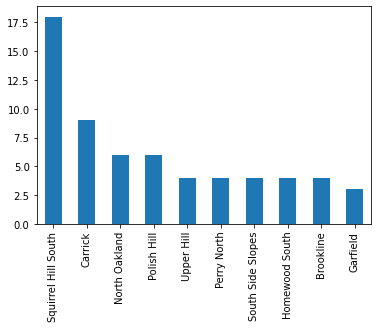

In [9]:
humps_per_hood.head(10).plot.bar()

In [17]:
humps_data = pd.DataFrame({"neighborhood" : humps_per_hood.axes[0], "humps" : humps_per_hood.values})
hmax = humps_data["humps"].max()
humps_data.head(10)

,neighborhood,humps
0,Squirrel Hill South,18
1,Carrick,9
2,North Oakland,6
3,Polish Hill,6
4,Upper Hill,4
5,Perry North,4
6,South Side Slopes,4
7,Homewood South,4
8,Brookline,4
9,Garfield,3


In [21]:
humps_data.tail(5)

,neighborhood,humps
13,Mount Washington,3
14,Highland Park,2
15,Stanton Heights,1
16,Overbrook,1
17,Central Oakland,1


Lets normalize all of this data to 1 meaning that the neighborhood that has the most speed bumps will get a score of 1 and the others will get a score based on its percentage of the max

In [11]:
humps_data_normal = pd.DataFrame({"neighborhood" : humps_per_hood.axes[0], "humps" : humps_per_hood.values/hmax})
humps_data_normal.head(10)

,neighborhood,humps
0,Squirrel Hill South,1.000000
1,Carrick,0.500000
2,North Oakland,0.333333
3,Polish Hill,0.333333
4,Upper Hill,0.222222
5,Perry North,0.222222
6,South Side Slopes,0.222222
7,Homewood South,0.222222
8,Brookline,0.222222
9,Garfield,0.166667


In [20]:
humps_data_normal.tail(5)

,neighborhood,humps
13,Mount Washington,0.166667
14,Highland Park,0.111111
15,Stanton Heights,0.055556
16,Overbrook,0.055556
17,Central Oakland,0.055556


# Finally, Applying the Data

Now lets apply the speed bumps data to a map of pittsburgh. The darker the neighborhood is colored, the more speed bumps it has

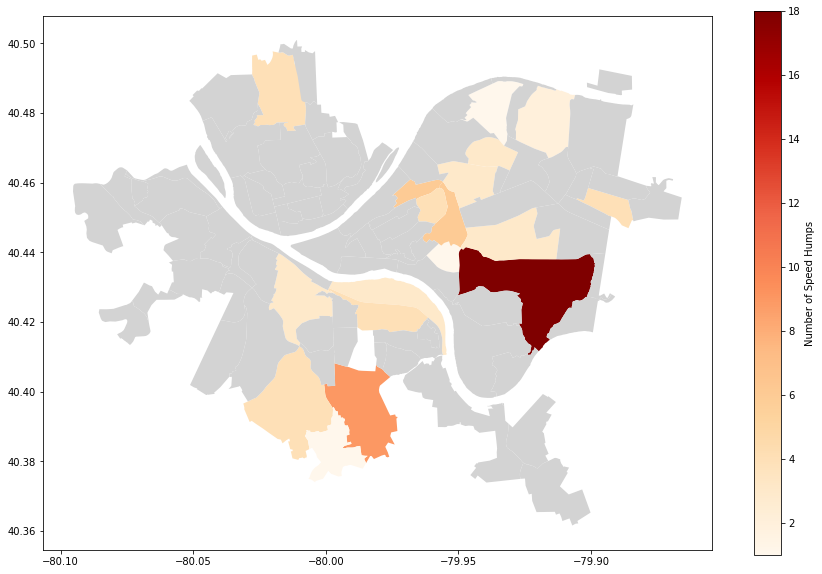

In [12]:
hoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
humps_map = hoods.merge(humps_data, how="left", left_on="hood", right_on="neighborhood")
humps_map.plot(column="humps", legend=True, legend_kwds={"label": "Number of Speed Humps"}, figsize=(15,10), missing_kwds={"color": "lightgrey"}, cmap="OrRd")
plt.style.use('seaborn')

# Conclusion
Based on the data, it is very clear that Squirrel Hill South is the worst neighborhood to hold a race in. With 18 speed bumps(which is double the amount the next worst neighborhood has) it would be very difficult to race around these streets. There is a 3 way tie for first place with one speed bump a piece. These neighborhoods are Central Oakland, Overbrook, Stanton Heights

# Intersection Markings

The data set that I chose was Intersection Markings, because a high volume of Intersection Markings such as crosswalks, indicate a large amount of turns and intersections in the city. If there are a lot of turns in a race, you wouldn't be able to see the cars at full speed, and it wouldn't make for a very entertaining race.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

# Importing the data

In [2]:
rawData = pd.read_csv("Intersection_Markings.csv")

* Testing to make sure that the data is correct

In [3]:
rawData.head(10)

,id,type,street,inactive,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1559483633,Crosswalk - Other,ELEVENTH ST,f,Central Business District,6.0,2.0,42003020100,6.0,2.0,2.0,2-3,40.444989,-79.993884
1,785965942,Crosswalk - Two Lined,PENN AVE,f,Strip District,7.0,2.0,42003020300,6.0,2.0,2.0,2-3,40.445717,-79.992465
2,2008474459,Crosswalk - Two Lined,MORNINGSIDE AVE,f,Morningside,7.0,10.0,42003101400,2.0,10.0,5.0,3-7,40.479579,-79.930685
3,1207933462,Crosswalk - Two Lined,TECH ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-8,40.440528,-79.942126
4,905740180,Crosswalk - Two Lined,FREW ST,f,Squirrel Hill South,5.0,14.0,42003980500,3.0,14.0,4.0,2-8,40.440468,-79.942267
5,768755224,Crosswalk - Two Lined,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443853,-79.939028
6,1308677189,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.443965,-79.938673
7,1159710354,Crosswalk - Two Lined,BEELER ST,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-26,40.445632,-79.931342
8,216672403,Crosswalk - Continental,FORBES AVE,f,Squirrel Hill North,8.0,14.0,42003140100,3.0,14.0,4.0,2-9,40.444583,-79.945557
9,356629441,Crosswalk - Continental,FIFTH AVE,f,Shadyside,8.0,14.0,42003140100,2.0,14.0,4.0,2-26,40.447427,-79.942548


In [4]:
modData = rawData['neighborhood'].value_counts()
modData.head(10)

Central Business District    620
South Side Flats             435
Squirrel Hill South          415
Shadyside                    323
Bloomfield                   302
East Liberty                 254
North Oakland                206
Squirrel Hill North          199
Strip District               192
Central Oakland              148
Name: neighborhood, dtype: int64

* The data is now shifted to show each neighborhoods number of intersection markings.

# Visualizing the data

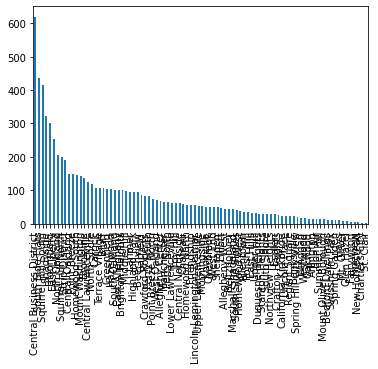

In [5]:
modData.plot.bar()

There are obviously too many neighborhoods in pittsburgh to focus on all of them, so we will only take a look at the most and least amount of intersection markings to see the best and worst neighborhoods to race in by this metric.

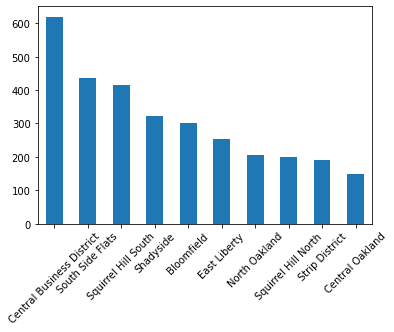

In [15]:
modData.head(10).plot.bar(rot=45)

The central business district is the worst to have a race in by how many markings it has, and it has the most by a lot. It is followed by South Side Flats, and then squirrel hill, which have a similar amount of intersection markings. 

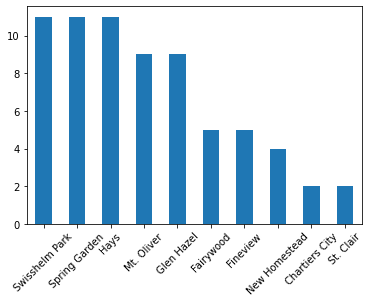

In [14]:
modData.tail(10).plot.bar(rot=45)

This data shows that the two neighborhoods with the least markings are chartiers city and St. Clair. It is followed by New Homestead.

# Converting our data into a dataframe

In [19]:
markingsData = pd.DataFrame({"neighborhood" : modData.axes[0], "Markings" : modData.values})
M_max = markingsData["Markings"].max()
markingsData.head(10)

,neighborhood,Markings
0,Central Business District,620
1,South Side Flats,435
2,Squirrel Hill South,415
3,Shadyside,323
4,Bloomfield,302
5,East Liberty,254
6,North Oakland,206
7,Squirrel Hill North,199
8,Strip District,192
9,Central Oakland,148


# Mapping our Data

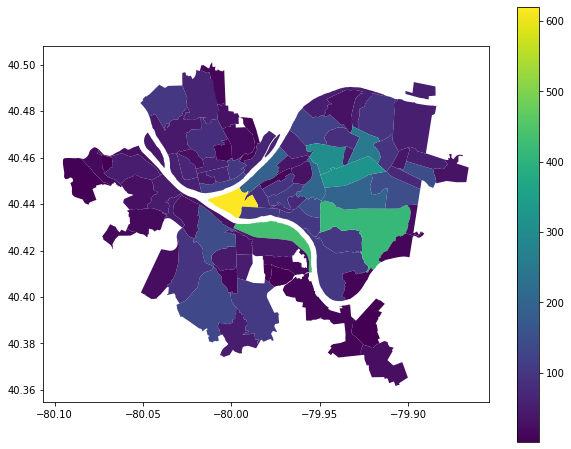

In [23]:
pittsburgh = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
markings_map = pittsburgh.merge(markingsData, how="left", left_on="hood", right_on="neighborhood")
markings_map.plot(column='Markings', legend=True, figsize=(10,8))

# Sources of bias

The map makes it very visible that plays an important role in the number of markings a neighborhood has. Generally, the bigger neighborhood, the warmer color it has on the map. The clear outlier is the Central business district, which is smaller than many of the other neighborhoods, but has the most markings by a lot. The map shows the density of the amount of markings a neighborhood has by comparing the number of markings to the size of the neighborhood. 

# Conclusion

Obviously, the amount of markings a neighborhood has is not a perfect metric. As shown, the neighborhoods that are the best according to this metric are some of the smallest, and some of the neighborhoods that rank at the very bottom are their simply because of their sheer size. However, this metric can be used along side the other metrics of speed bumbs and road quality. For example, the other metrics had narrowed down the neighborhoods to a certain subset 

# Road Obstructions

The dataset I chose to analyze is the 311 calls dataset which includes reports of street obstructions and potholes, which would be necessary to avoid for a quality racing experience.

As always, lets import all modules for data analysis.

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

The 311 data is available as a `.csv` on the WPRDC website, so we can dowload it and convert it into a `pandas.DataFrame` using the following code:

In [2]:
three11_data = pd.read_csv("https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4")
#Alternate source
#three11_data = pd.read_csv('76fda9d0-69be-4dd5-8108-0de7907fc5a4.csv')

Next we can filter the 311 dataset into just street obstruction, potholes, and other road issues. We then call `.sample()` in order to verify that our code worked.

In [8]:
road_obstructions = three11_data[(three11_data.REQUEST_TYPE == "Street Obstruction/Closure")|(three11_data.REQUEST_TYPE == "Potholes")|(three11_data.REQUEST_TYPE == "Road")]
road_obstructions.sample(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
151780,57726.0,2016-03-28T13:16:00,Potholes,Call Center,1,DPW - Street Maintenance,Central Lawrenceville,7.0,9.0,4.200309e+10,2.0,9.0,2.0,3-3,-79.956580,40.467562,EXACT
510873,528654.0,2021-06-01T08:28:00,Potholes,Website,1,DPW - Street Maintenance,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.944289,40.471018,EXACT
247592,259887.0,2018-06-15T13:22:00,Potholes,Call Center,3,DPW - Street Maintenance,Upper Lawrenceville,7.0,10.0,4.200310e+10,2.0,10.0,2.0,3-5,-79.949741,40.484527,EXACT
96410,126512.0,2017-01-20T11:51:00,Potholes,Website,1,DPW - Street Maintenance,Lower Lawrenceville,7.0,6.0,4.200309e+10,2.0,6.0,2.0,3-3,-79.966906,40.471717,EXACT
137775,79238.0,2016-06-15T12:15:00,Potholes,Call Center,1,DPW - Street Maintenance,Central Northside,1.0,25.0,4.200322e+10,1.0,25.0,1.0,1-6,-80.005883,40.457543,EXACT
257921,270745.0,2018-07-16T12:13:00,Potholes,Website,1,DPW - Street Maintenance,East Carnegie,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,-80.074023,40.417891,EXACT
200591,212743.0,2018-01-25T08:05:00,Potholes,Call Center,1,DPW - Street Maintenance,Brookline,4.0,32.0,4.200332e+10,5.0,32.0,6.0,4-26,-80.011257,40.393181,EXACT
176923,21885.0,2015-09-01T10:11:00,Potholes,Call Center,1,DPW - Street Maintenance,Point Breeze,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-17,-79.920731,40.449782,EXACT
503512,521289.0,2021-05-06T13:00:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,3-6,-79.948472,40.461209,EXACT
77287,145041.0,2017-04-12T12:55:00,Potholes,Call Center,1,DPW - Street Maintenance,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,-80.017344,40.404718,EXACT


The 311 dataset contains a lot of extraneous data that we do not need for now, so we can create a `Series` that has each neighborhood and its total number of road obstructions. The `value_counts()` method will automatically create this for us.

In [14]:
num_ro = road_obstructions['NEIGHBORHOOD'].value_counts()
num_ro.head()

Brookline                3782
Squirrel Hill South      2762
Bloomfield               2667
Carrick                  2593
Central Lawrenceville    1802
Name: NEIGHBORHOOD, dtype: int64

Now, let's take a look at neighborhoods with the most and least number of road obstructions:

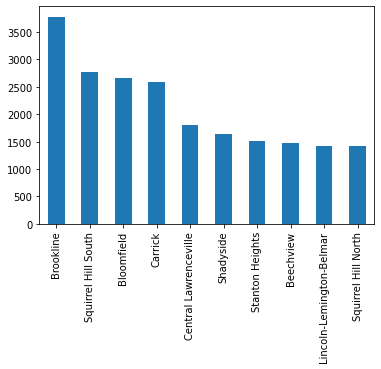

In [64]:
num_ro.head(10).plot.bar()

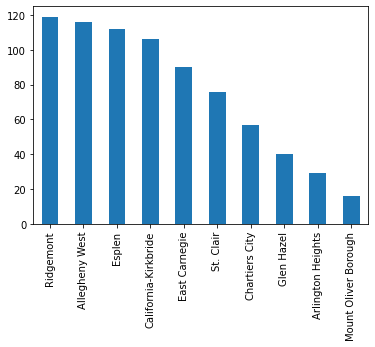

In [25]:
num_ro.tail(10).plot.bar()

Now, we can plot the number of potholes onto a map. To do this, we use `geopandas` and `Neighborhoods_.shp` which contains map data for each neighborhood in Pittsburgh.

In [15]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

Now we can `merge` our `num_ro` dataset with our `neighborhoods` GeoDataFrame, which will give us a map with each count of road obstructions mapped on each neighborghood of Pittsburgh.

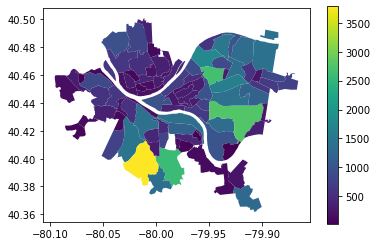

In [16]:
pm = pd.DataFrame({'neighborhood': num_ro.axes[0], 'obs': num_ro.values})
ro_map = neighborhoods.merge(pm, how='left', left_on='hood', right_on='neighborhood')
ro_map.plot(column='obs',legend=True)

Looking at the map, we can notice a problem with this: the larger neighborhoods almost universally have more potholes than smaller ones.

To account for this, we can calculate the density of road obstructions. Fortunately, the `Neighborhoods_.shp` file contains the area of each neighborhood, measured in square miles. We can add a new column to the `ro_map` dataframe with the density of road obstructions, which we can calculate as such:

In [17]:
ipsm = ro_map["obs"] / ro_map["sqmiles"]

ro_map["incident_density"] = ipsm

With our new data, let's plot the density of street obstructions on the map.

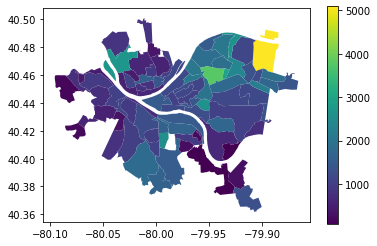

In [105]:
ro_map.plot(column='incident_density',legend=True)

This plot makes much more sense, we can see that there are more potholes in the north-east neighborhoods, now let's look at which neighborhoods have the most and least potholes, sorted by density.

In [22]:
ro_map.filter(['neighborhood', 'incident_density']).sort_values('incident_density', ascending=False).head(10)

,neighborhood,incident_density
19,Lincoln-Lemington-Belmar,5096.428571
31,Bloomfield,3799.145299
48,Friendship,2962.264151
70,Marshall-Shadeland,2722.943723
42,Morningside,2625.654450
0,Central Oakland,2622.775801
57,Knoxville,2579.470199
77,East Liberty,2380.378657
69,Point Breeze North,2188.811189
61,Polish Hill,2105.882353


Over the course of the last 6 years, Lincoln-Lemington-Belmar has had an incredible 5000 potholes per square mile! I actually can personally relate because I used to drive on Lincoln Ave on the way to school.

I went back to Google Maps to take a look at the roads:

![1](https://i.imgur.com/T864ZF9.jpg)
![2](https://i.imgur.com/8vXdaaC.jpg)


## Best Roads
Now we can sort our neighborhoods by which ones have the least amount of potholes and road obstructions (by density)

In [23]:
ro_map.filter(['neighborhood', 'incident_density']).sort_values('incident_density', ascending=True).head(10)

,neighborhood,incident_density
68,Hays,82.285714
88,Glen Hazel,87.719298
83,Fairywood,173.374613
78,East Carnegie,208.333333
63,Arlington Heights,219.696970
50,St. Clair,245.161290
79,New Homestead,292.191436
85,Ridgemont,322.493225
9,Northview Heights,383.386581
84,Chartiers City,431.818182


## One slight issue...
Some of the neighborhoods have very few roads, for example Hays:

![](https://i.imgur.com/GaWuDuh.png)

This will be considered when we draw our final conclusion

# Proposed Route

![Route](https://i.imgur.com/RTsvYiI.png)

Our route begins in Bloomfield, moves through Oakland, passes through Hazelwood, crosses the Monongahela River into Homestead, back over the Monongahela by the Rankin Bridge, then through Swissvale and Rankin, then through Homewood and East Liberty, back into Bloomfield.

## Cole's Conclusion
Based on the data, it is very clear that Squirrel Hill South is the worst neighborhood to hold a race in. With 18 speed bumps(which is double the amount the next worst neighborhood has) it would be very difficult to race around these streets. There is a 3 way tie for first place with one speed bump a piece. These neighborhoods are Central Oakland, Overbrook, Stanton Heights

## Gabe's Conclusion
Obviously, the amount of markings a neighborhood has is not a perfect metric. As shown, the neighborhoods that are the best according to this metric are some of the smallest, and some of the neighborhoods that rank at the very bottom are their simply because of their sheer size. However, this metric can be used along side the other metrics of speed bumbs and road quality. For example, the other metrics had narrowed down the neighborhoods to a certain subset 

## Drew's Conclusion
Pittsburgh is not the best place to street race. But, if you wanted to the mentioned neighborhoods are the best places to do it because of their lack of road obstructions.

Neighborhoods like Hazelwood and Homestead provide smooth, long straightaways, while Oakland might be better for more challenging races.